In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sps

: 

**Ejercicio:** Simular $100$ tiradas de una dado de $20$ caras para obtener una muestra $x_1, \dots , x_{100}$.

* **TAREA:** Acotar la probabilidad de que cada resultado posible esté representado en la muestra.
    * Sugerencia: recordar que $P(A\cup B) \leq P(A)+P(B).$

* Calcular la media, mediana, varianza y desvío estándar muestral.

* Encontrar (e implementar) las funciones de probabiliad y distribución acumulada empíricas. Graficar la acumulada empírica.

In [3]:
np.random.seed(2023) # Esto me deja obtener siempre los mismos resultados || 2024 no funciona como yo quiero :(

In [4]:
sample = np.random.randint(low=1, high=21, size=100)

In [5]:
sample.sort()
print(sample)

[ 1  1  1  2  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  5  5  6  6
  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 11 11 12 12 12 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16
 16 16 16 16 16 16 16 17 17 17 17 18 18 18 18 18 18 18 18 19 19 19 20 20
 20 20 20 20]


In [6]:
mean      = np.mean(sample)
median    = np.median(sample)
variance  = np.var(sample, ddof=1) # ddof=1 está para dividir por n-1
deviation = np.std(sample, ddof=1)

print('media =', mean.round(4), ', mediana =', median.round(4), ', desvío =', deviation.round(4), ', varianza =', variance.round(4))

media = 10.88 , mediana = 9.0 , desvío = 5.8539 , varianza = 34.2683


In [7]:
# Función de probabilidad puntual empírica
def epdf(sample, x):
  return sum(x_i == x for x_i in sample)/len(sample)

# Función de probabilidad acumulada empírica
def ecdf(sample, x):
  return sum(x_i <= x for x_i in sample)/len(sample)

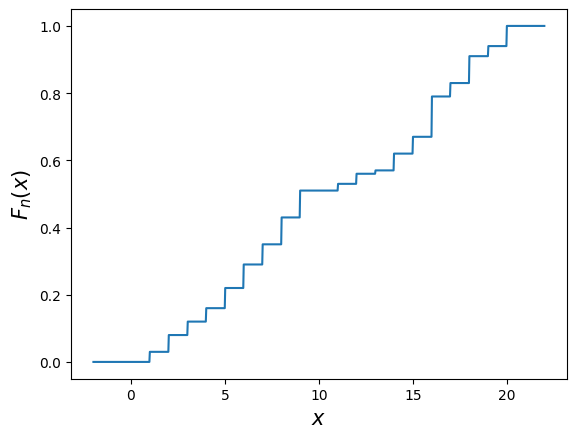

In [8]:
x = np.linspace(-2, 22, 1000) # Voy a graficar en el intervalo [-2,22] (y lo discretizo)

plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$F_n(x)$', fontsize = 15)
plt.plot(x, ecdf(sample, x))

plt.show()

**TAREA:** En base a la distribución empírica de la muestra anterior, generar una nueva muestra $x^*_1,\dots, x^*_{20}$.

* Cuál es la probabilidad de obtener al menos un $10$?

* Calcular la probabilidad de que el máximo de esta muestra sea $20$.

In [9]:
new_sample = np.random.choice(sample, 20) # Con esto puedo simular una nueva muestra. Por default se hace con reemplazo
new_sample.sort()
print(new_sample)

[ 1  1  2  2  4  5  5  6  8  8  9  9 13 15 16 16 16 16 16 20]


## Correr está línea para generar una muestra (libre de spoilers)

In [10]:
lam = 1 / 10
mu  = 1 / lam
N   = 1000000

sample = np.random.exponential(mu, size=N) # En la documentación vemos que el parámetro que hay que pasar es la esperanza y no el lambda (triste, lo sé)

## **Ejercicio:** La muestra generada se encuentra en una variable llamada 'sample'.

* Realizar un histograma de densidad con ancho de banda $5$ para las primeras $100$ observaciones. Comparar con las próximas $100$ observaciones Ver qué ocurre a medida que cambia la cantidad de intervalos usada.

* Qué distribución parecen tener los datos? Para distintos valores de $M$, comparar la función de densidad poblacional con el histograma de densidad usando las primeras $M$ observaciones.

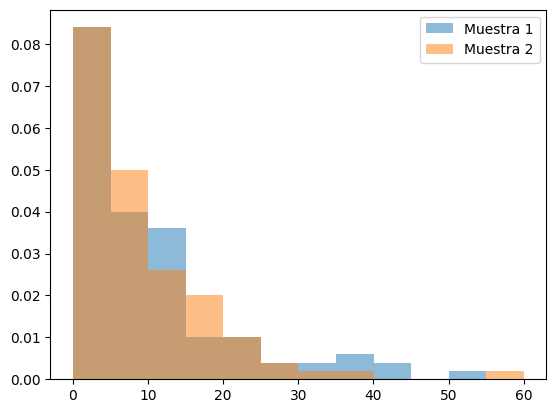

In [11]:
bw = 5                           # Ancho de banda
small_sample_1 = sample[0:100]   # Me quedo con los primeros valores
small_sample_2 = sample[100:200] # Los próximos 100

max = np.max([np.max(small_sample_1), np.max(small_sample_2)]) # Es razonable usar los mismos intervalos para ambas muestras
min = np.min([np.min(small_sample_1), np.min(small_sample_2)])

plt.hist(small_sample_1, bins=np.arange(min, max + bw, bw), density=True, label='Muestra 1', alpha=.5)
plt.hist(small_sample_2, bins=np.arange(min, max + bw, bw), density= True, label='Muestra 2', alpha =.5)
plt.legend()
plt.show()

In [12]:
bins = np.linspace(min(sample), max(sample) + bw, 10+1)
plt.hist(small_sample_1, bins=bins, density=True, label='Muestra 1', alpha=.5)
plt.hist(small_sample_2, bins=bins, density=True, label='Muestra 2', alpha =.5)
plt.legend()
plt.show()

TypeError: 'numpy.float64' object is not callable

In [13]:
M = 100 # Voy a incluir solamente los primeros M datos

t  = np.linspace(0, max(sample), int((max(sample) - min(sample)) / 0.01)) # Discretizamos la recta para graficar la densidad

# Densidad de una Exponencial
def pdfExp(lam, x):
    return lam * np.exp(-lam * x)  # Dedicí implementarlo, pero podría llamar a scipy.stats.expon.pdf(x, loc=0, scale=1/lam)

plt.plot(t, pdfExp(lam, t), color='red', label='Densidad poblacional')
plt.hist(sample[0:M], bins=int(np.sqrt(M))+1 , density=True, label='Densidad empírica')

plt.legend()
plt.show()

TypeError: 'numpy.float64' object is not callable